# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



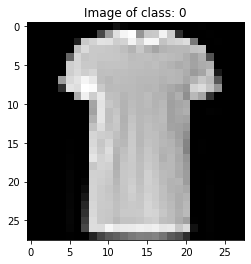

In [ ]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [ ]:
# Lets check image shape
image.shape

#(image.squeeze()).shape


torch.Size([1, 28, 28])

In [ ]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [ ]:
tr_l = torch.utils.data.DataLoader(training_data, batch_size=100, shuffle=True)

val_l = torch.utils.data.DataLoader(test_data, batch_size=100, shuffle=True)

data_iterator = iter(tr_l)
images, labels = data_iterator.next()

#images.squeeze_()
#print (images.shape)
print (images.shape)
print (labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


# Task 2:

Create a Neural Network

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

import torch.nn.functional as act_f
class NN(nn.Module):

    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(784, 392)
        self.fc2 = nn.Linear(392, 196)
        self.fc3 = nn.Linear(196, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.reshape(-1, 784)
        x = act_f.relu(self.fc1(x))
        x = act_f.relu(self.fc2(x))
        x = act_f.relu(self.fc3(x))
        return act_f.log_softmax(self.fc4(x), dim = 1)


model = NN()
print(model)

Using cpu device
NN(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=196, bias=True)
  (fc3): Linear(in_features=196, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
)


# Task 3:

Specify loss and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

# Task 3:

Train model using for loop

In [ ]:
from torch.autograd import Variable
from torch.utils.data import DataLoader


for epochs in range (10):

  sum_loss = 0
  correct_pred = 0

  for batch, (X, y) in enumerate(tr_l):
      X, y = X.to(device), y.to(device)
        
      pred = model.forward(X)
      loss = loss_fn(pred, y)
        
      _, preds = torch.max(pred, dim = 1)

      correct_pred += (preds == y).float().sum()
      sum_loss += loss
      
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      if batch % 100 == 0:
        loss = loss.item()
        current = batch * len(X)
        print("loss %.5f" % loss)
  
  ac_tr = correct_pred / len(training_data)
  los_ = sum_loss / len(tr_l)
  print("\tEpoch: ", epochs + 1, "\tTrain loss: %.7f" % los_, "\tTrain Accuracy: %.2f percents" % (ac_tr*100))


  correct_test = 0
  with torch.no_grad():
    for X, y in val_l:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      _, preds = torch.max(pred, dim = 1)
      correct_test += (preds == y).float().sum()

  correct_test = correct_test / len (val_l)
  print("\tAccuracy (test) : %.2f percents" % (correct_test), "\n")


loss 2.30647
loss 0.47108
loss 0.49337
loss 0.44001
loss 0.31133
loss 0.39883
	Epoch:  1 	Train loss: 0.5519108 	Train Accuracy: 79.89 percents
	Accuracy (test) : 84.29 percents 

loss 0.35865
loss 0.33013
loss 0.41712
loss 0.34341
loss 0.35370
loss 0.47847
	Epoch:  2 	Train loss: 0.3734733 	Train Accuracy: 86.30 percents
	Accuracy (test) : 85.42 percents 

loss 0.40369
loss 0.24433
loss 0.41189
loss 0.32225
loss 0.34401
loss 0.29124
	Epoch:  3 	Train loss: 0.3338997 	Train Accuracy: 87.72 percents
	Accuracy (test) : 87.14 percents 

loss 0.26791
loss 0.19124
loss 0.20540
loss 0.29343
loss 0.22993
loss 0.27407
	Epoch:  4 	Train loss: 0.3096023 	Train Accuracy: 88.53 percents
	Accuracy (test) : 87.44 percents 

loss 0.33007
loss 0.24138
loss 0.34246
loss 0.23097
loss 0.31454
loss 0.20511
	Epoch:  5 	Train loss: 0.2877294 	Train Accuracy: 89.30 percents
	Accuracy (test) : 87.56 percents 

loss 0.37731
loss 0.20462
loss 0.21277
loss 0.18624
loss 0.21869
loss 0.15299
	Epoch:  6 	Train loss

# Task 4:

Report accuracy from train set, and test set independently

In [ ]:
p_test = torch.tensor([])
v_test  = torch.tensor([])
loss = 0
cor = 0

with torch.no_grad():
  for X, y in val_l:
       
    X, y = X.to(device), y.to(device)

    pred = model.forward(X)

    loss += loss_fn(pred, y)
    _, preds = torch.max(pred, dim=1)

    cor += (preds == y).float().sum()
    p_test = torch.cat((p_test, model.forward(X)), 0)
    v_test  = torch.cat((v_test , y), 0)

loss = loss / len(val_l)


ac = cor / len(test_data)
print("Test Accuracy %.6f \n" % (ac), "Test Loss: %.4f" % loss)

Test Accuracy 0.892000 
 Test Loss: 0.3145


# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

In [ ]:
_, preds = torch.max(p_test, dim=1)
cmatrix = confusion_matrix(v_test.numpy(), preds.numpy())

print("Confusion Matrix\n", cmatrix)

Confusion Matrix
 [[872   1  28  33   5   2  51   0   8   0]
 [  0 970   1  22   4   0   2   0   1   0]
 [ 18   0 833   9 102   0  38   0   0   0]
 [ 15   6  15 903  42   0  15   0   4   0]
 [  1   0  77  24 855   0  43   0   0   0]
 [  0   0   0   1   0 974   0  17   0   8]
 [161   1 102  26  77   0 620   0  13   0]
 [  0   0   0   0   0  15   0 966   0  19]
 [  3   0   1   4   4   3   1   3 981   0]
 [  0   0   0   0   0  11   1  42   0 946]]


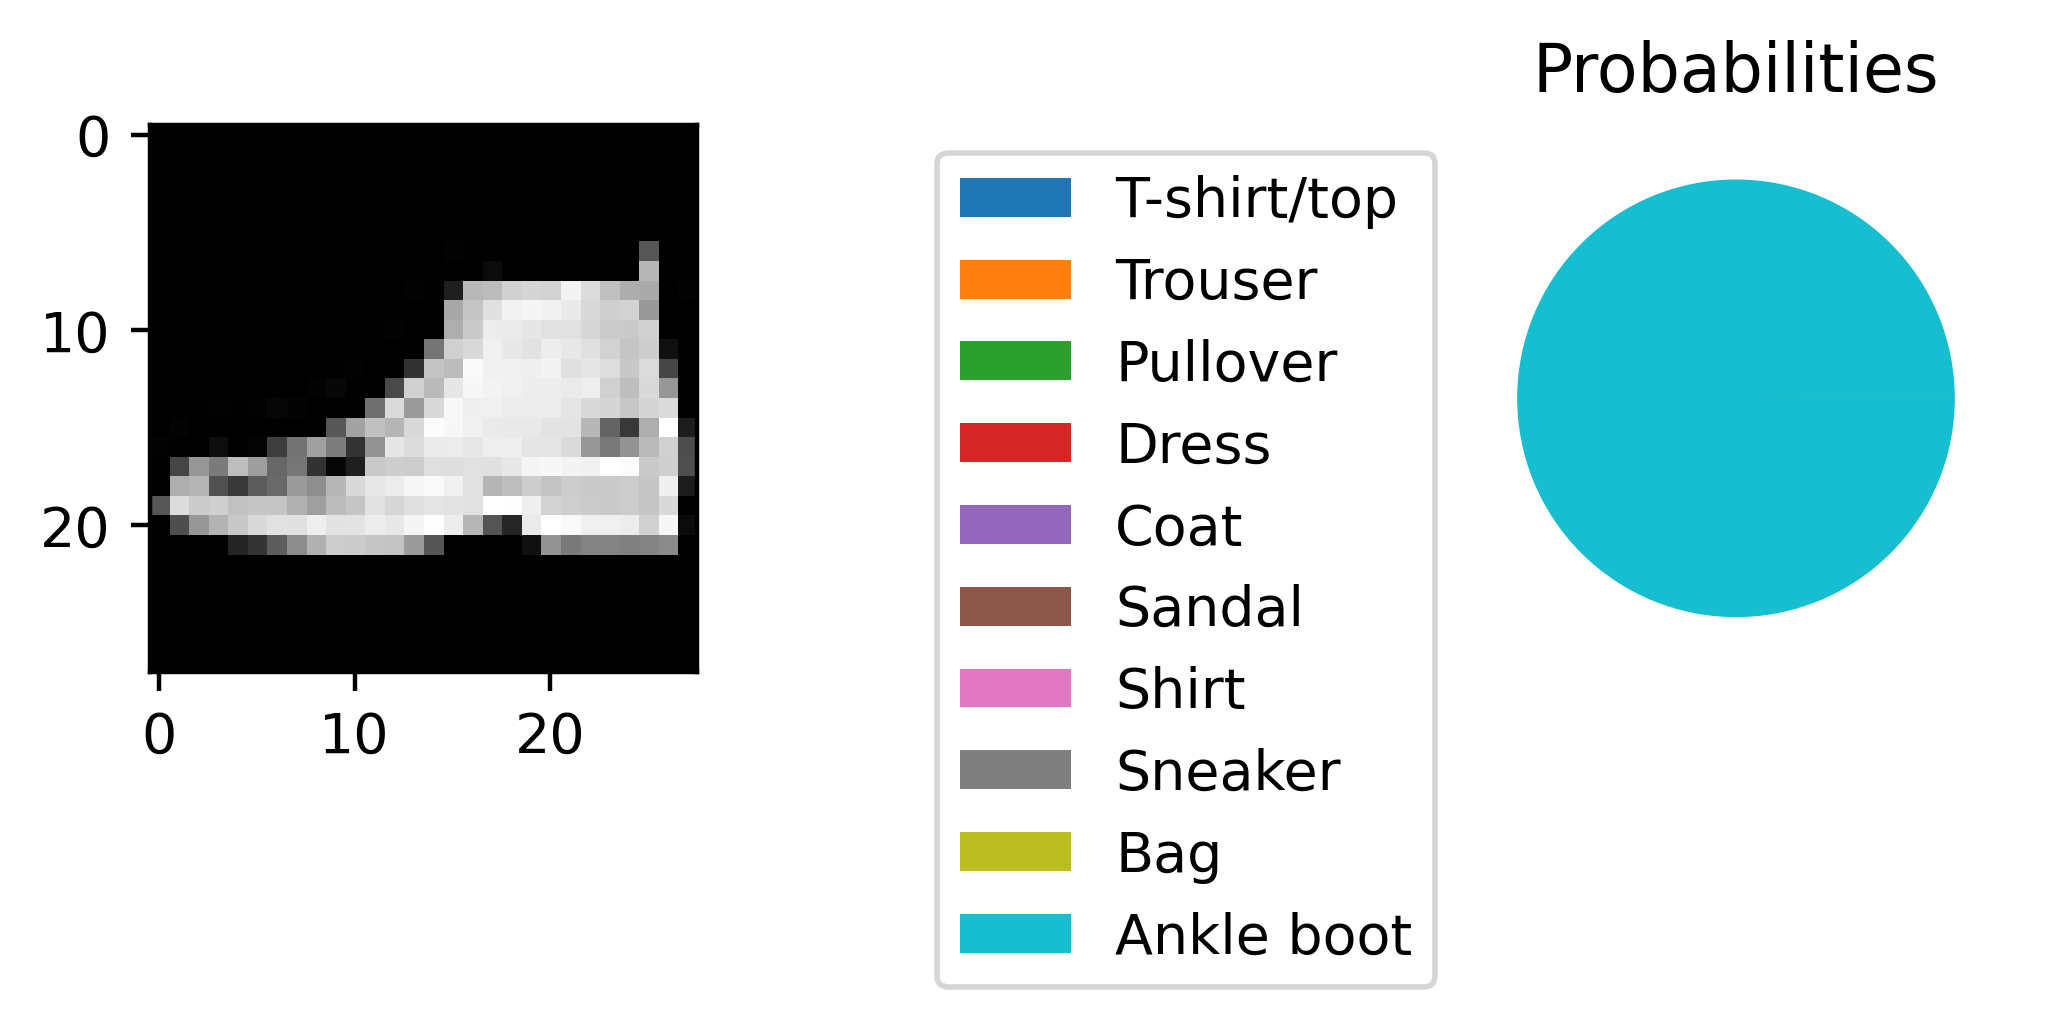

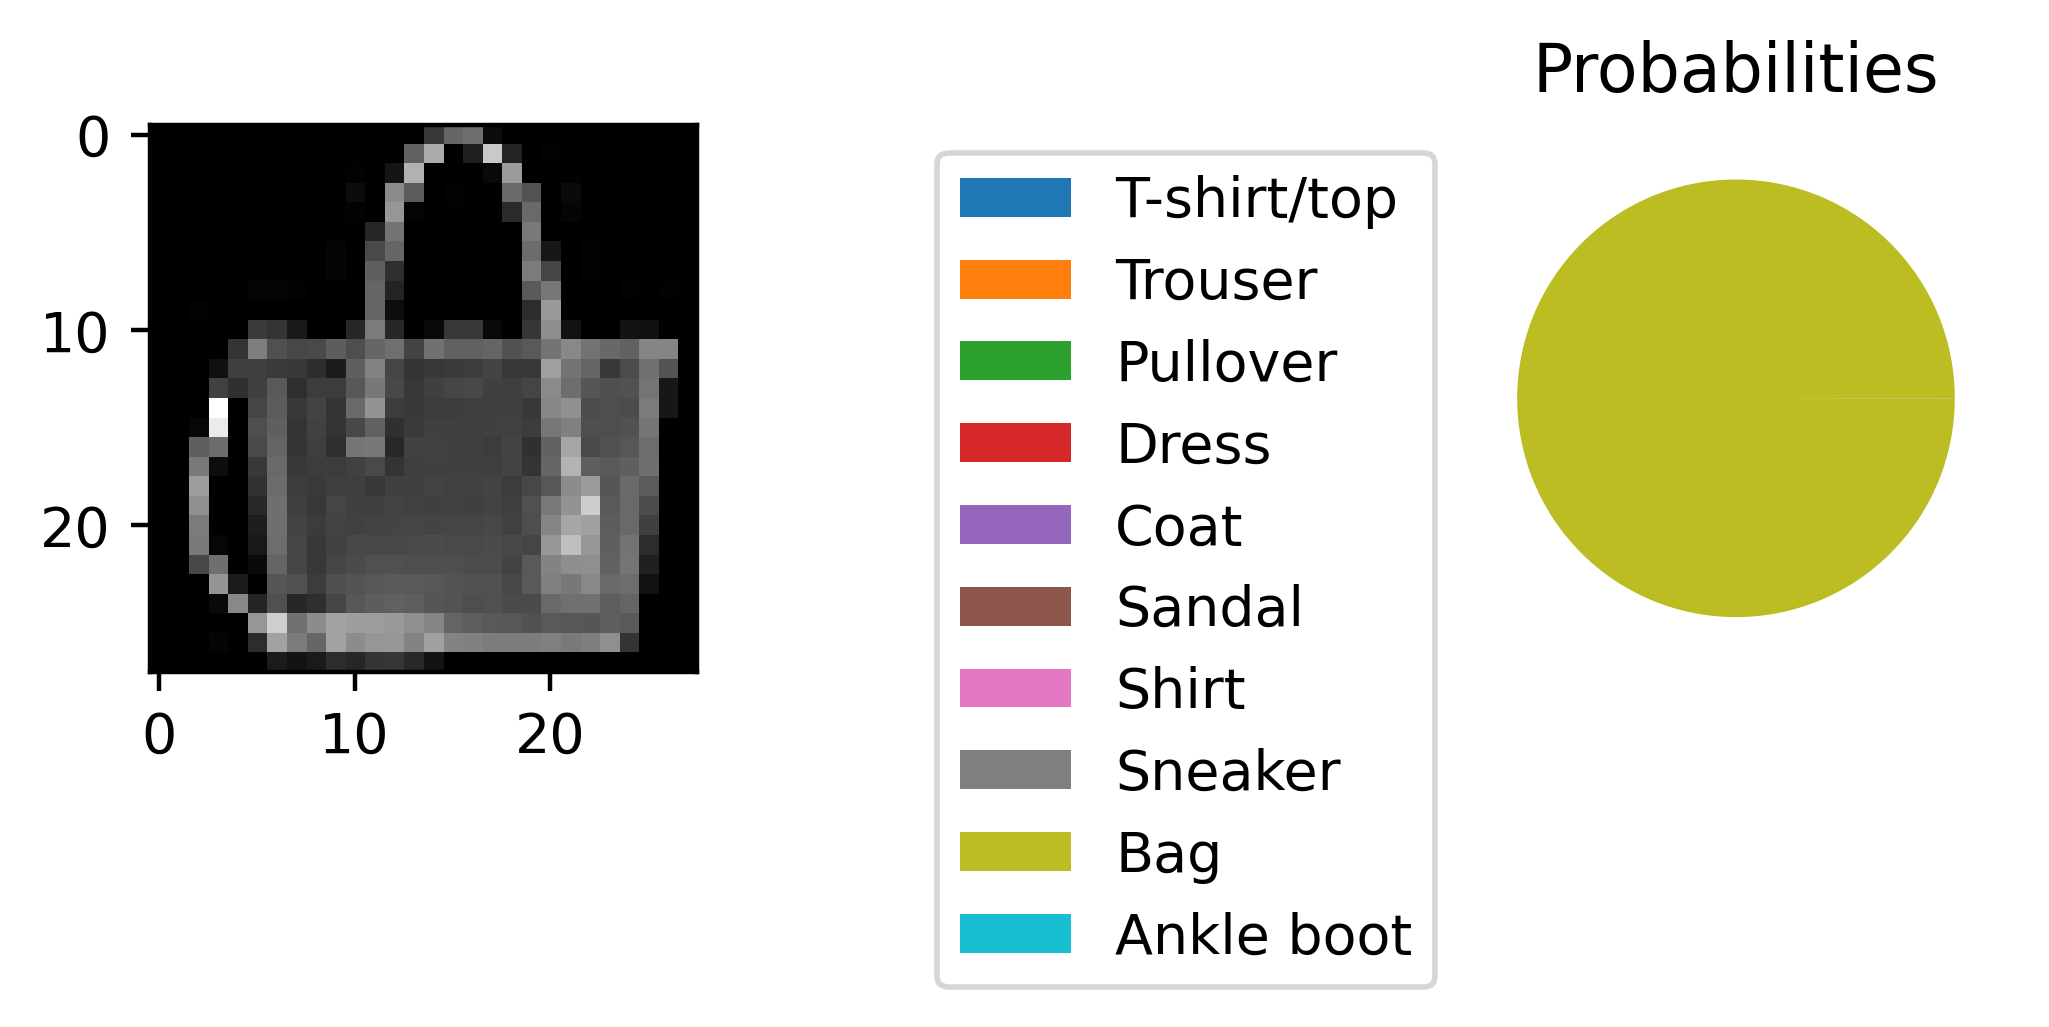

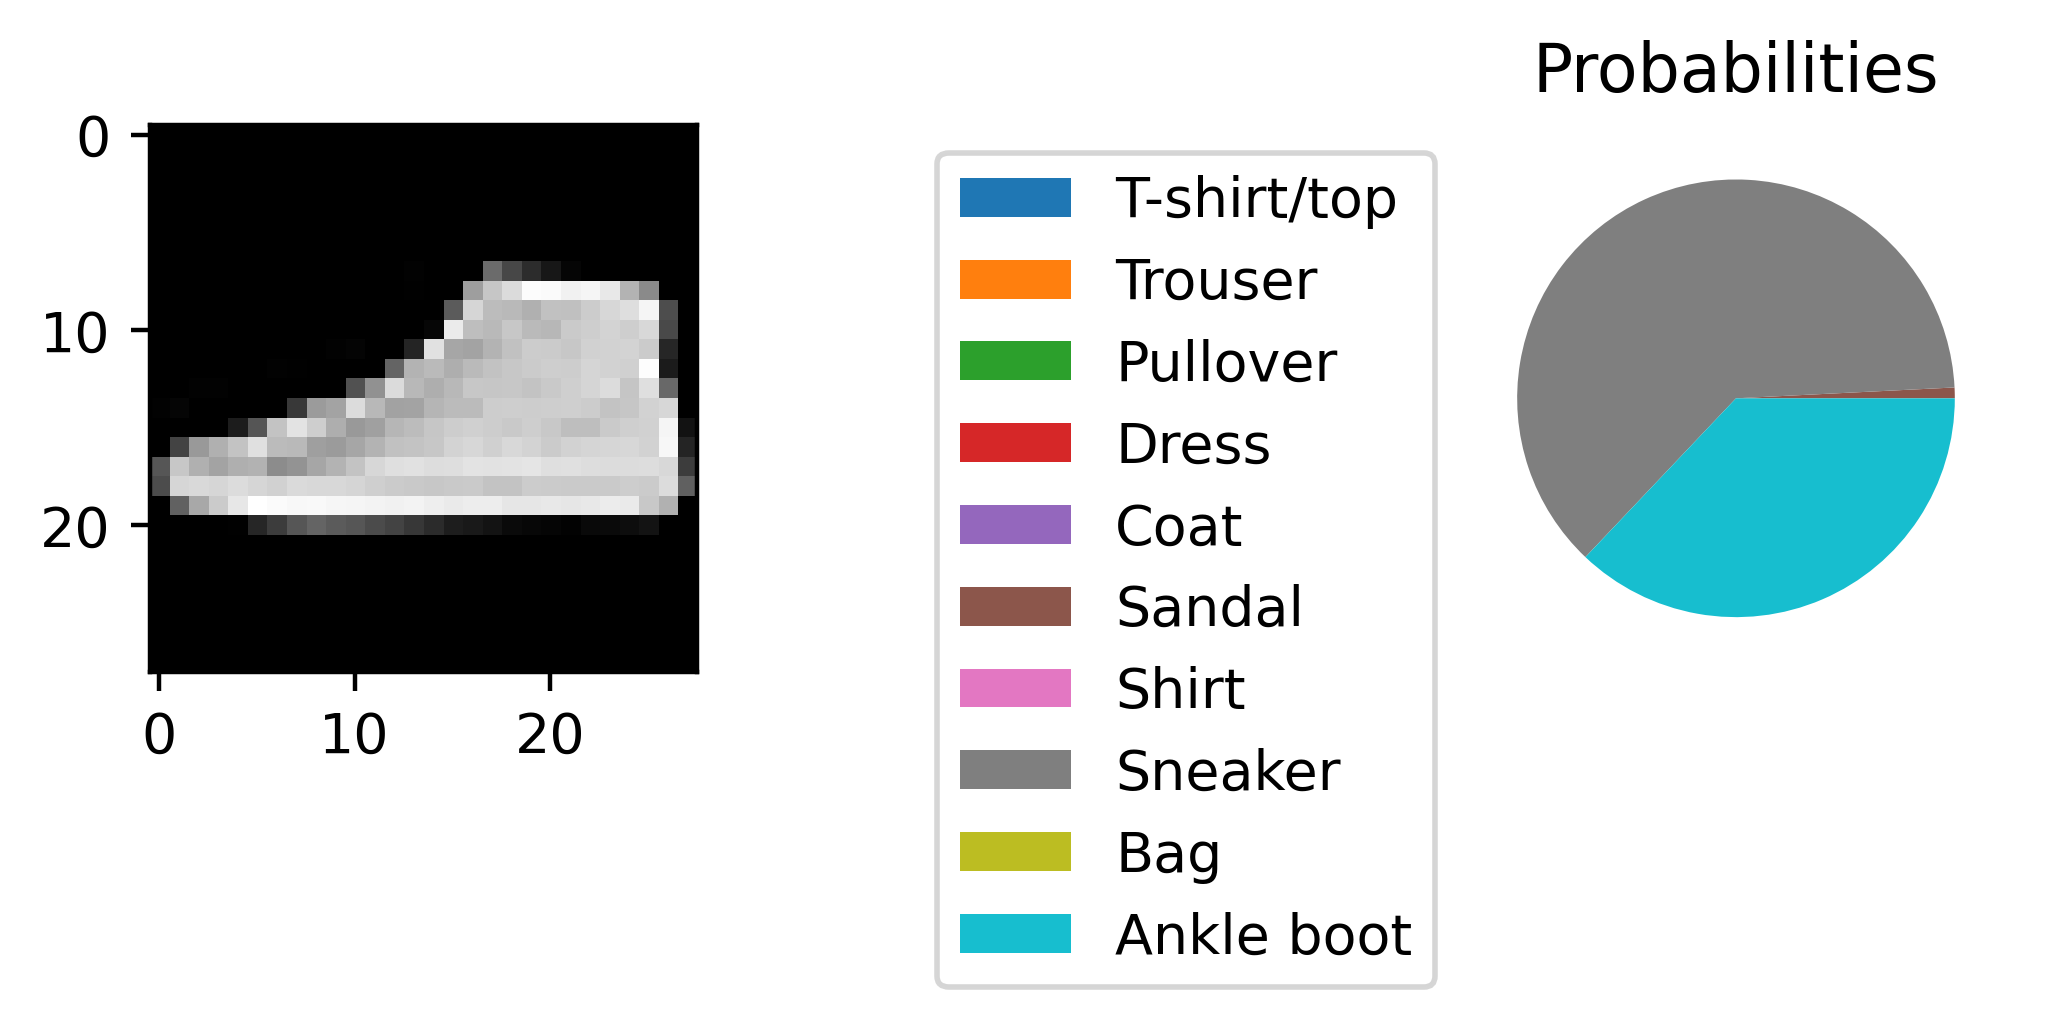

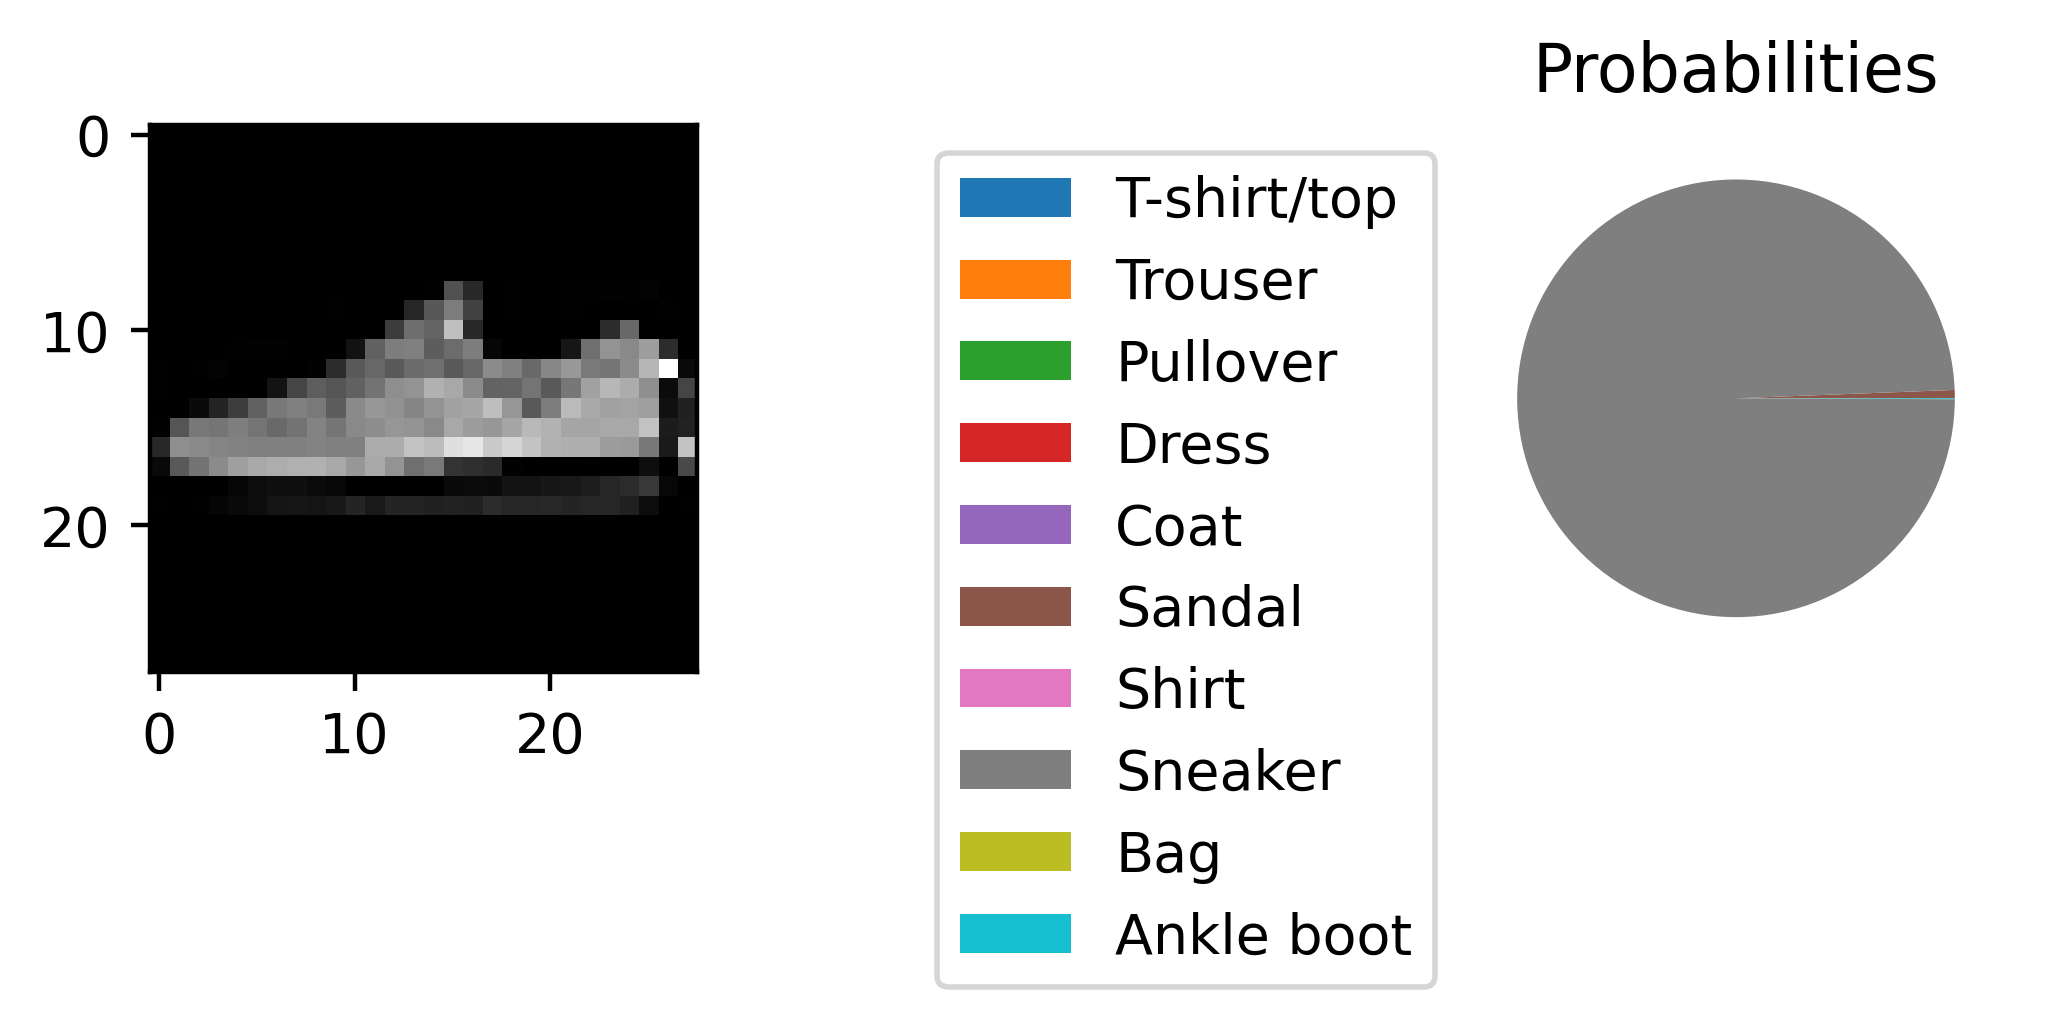

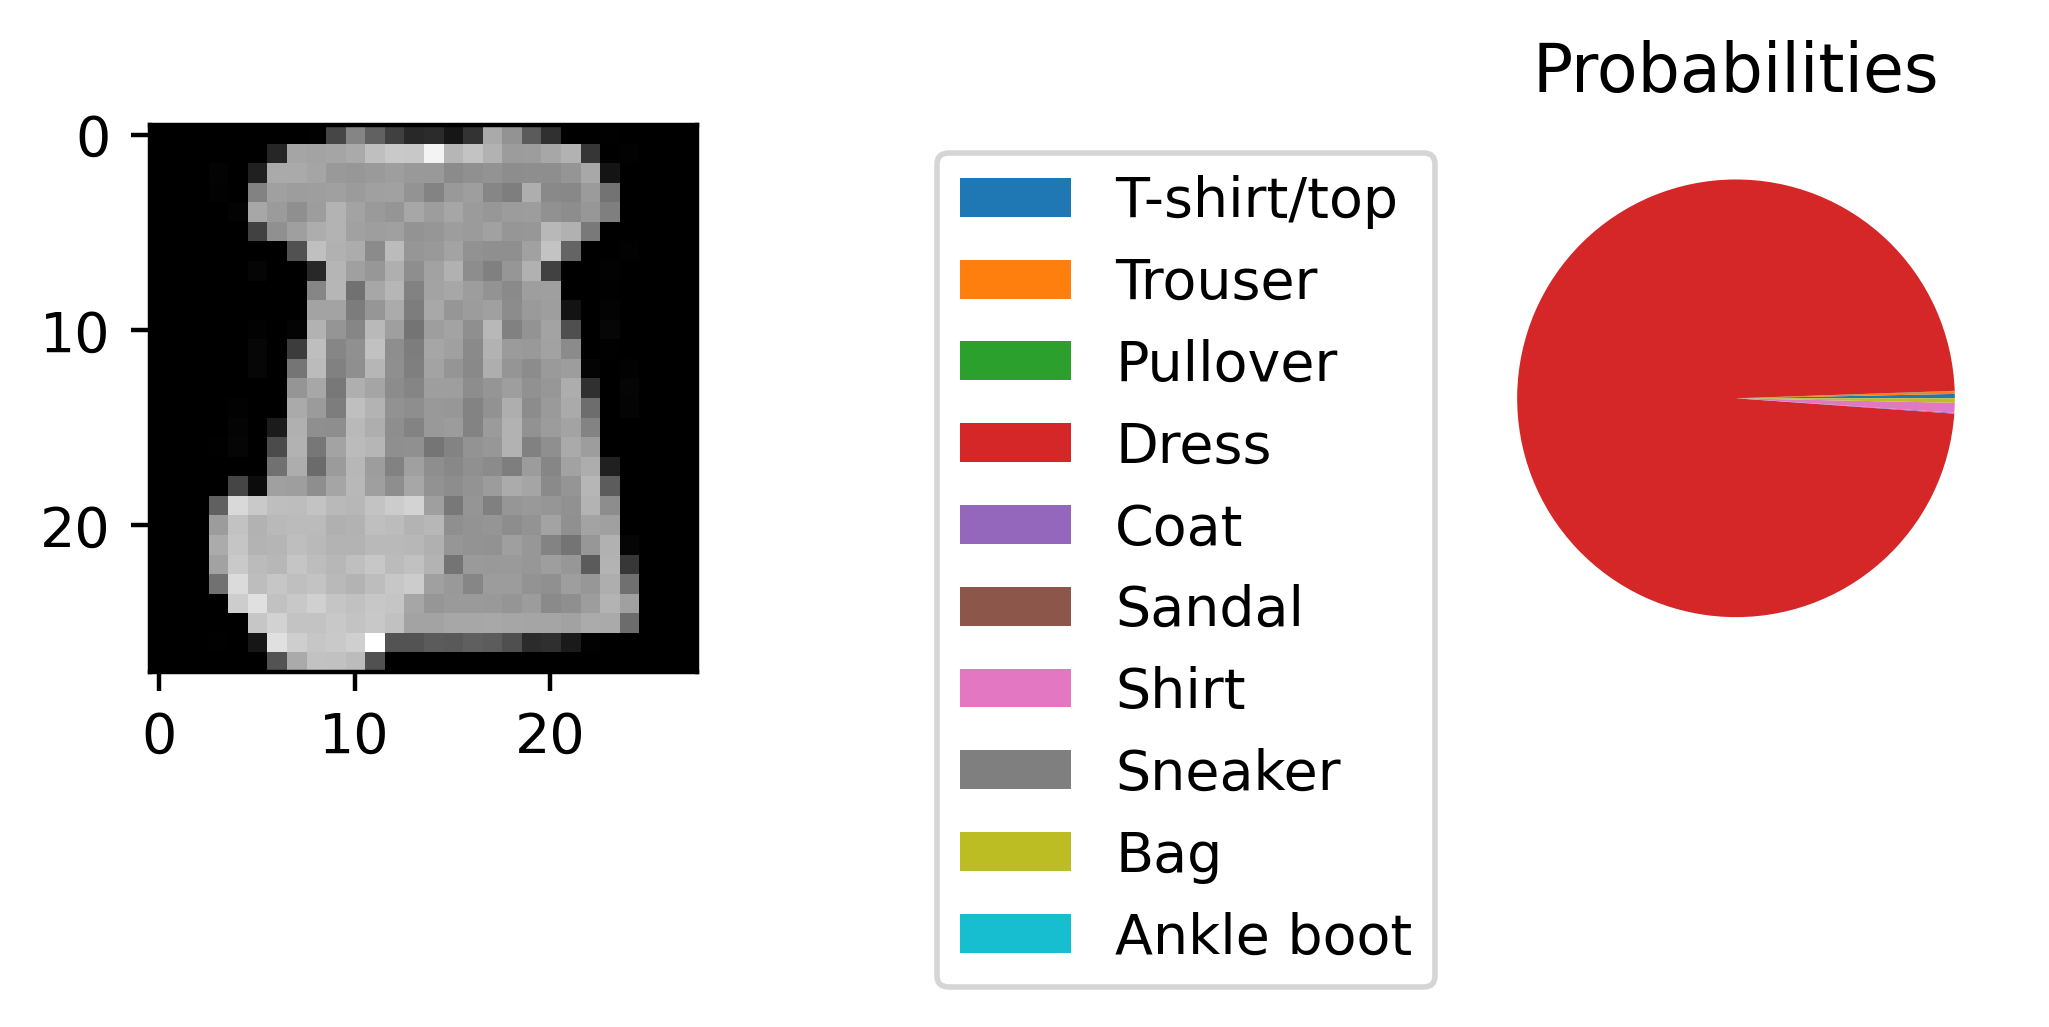

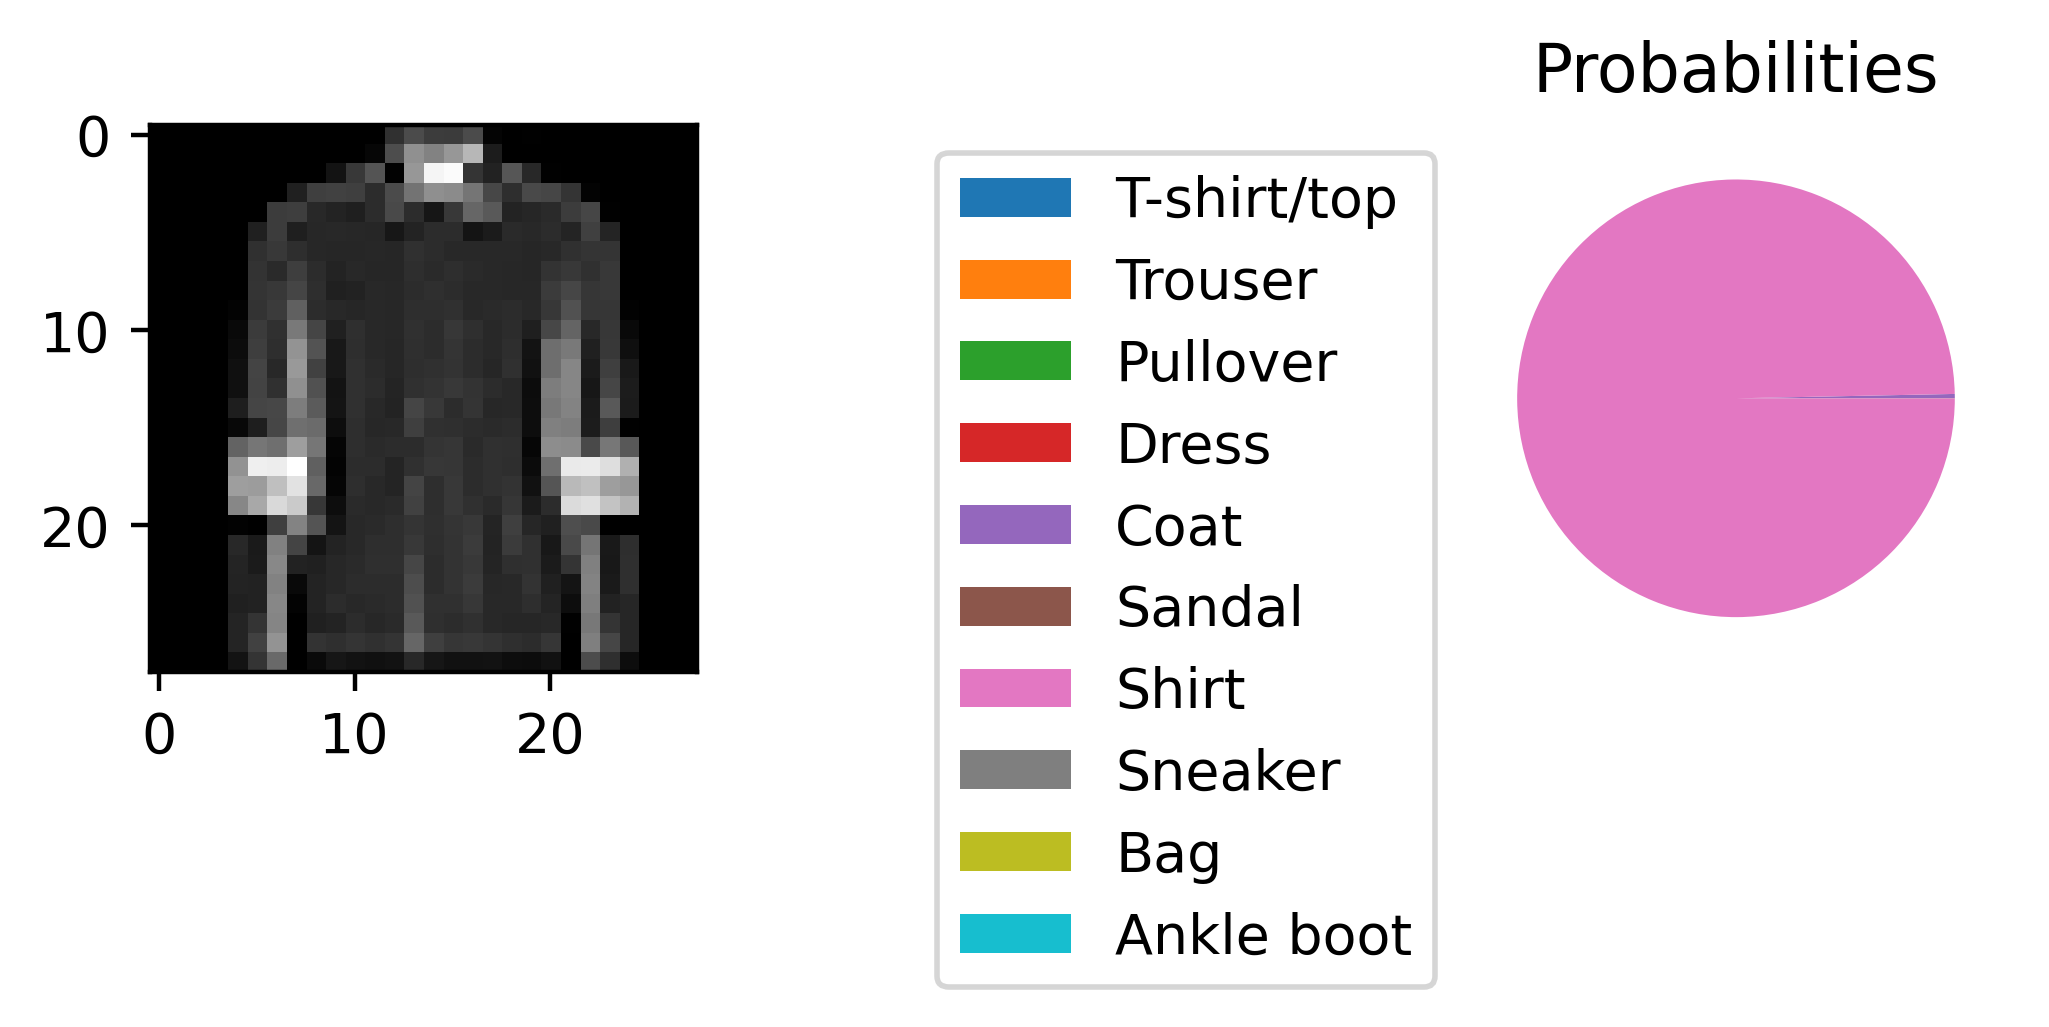

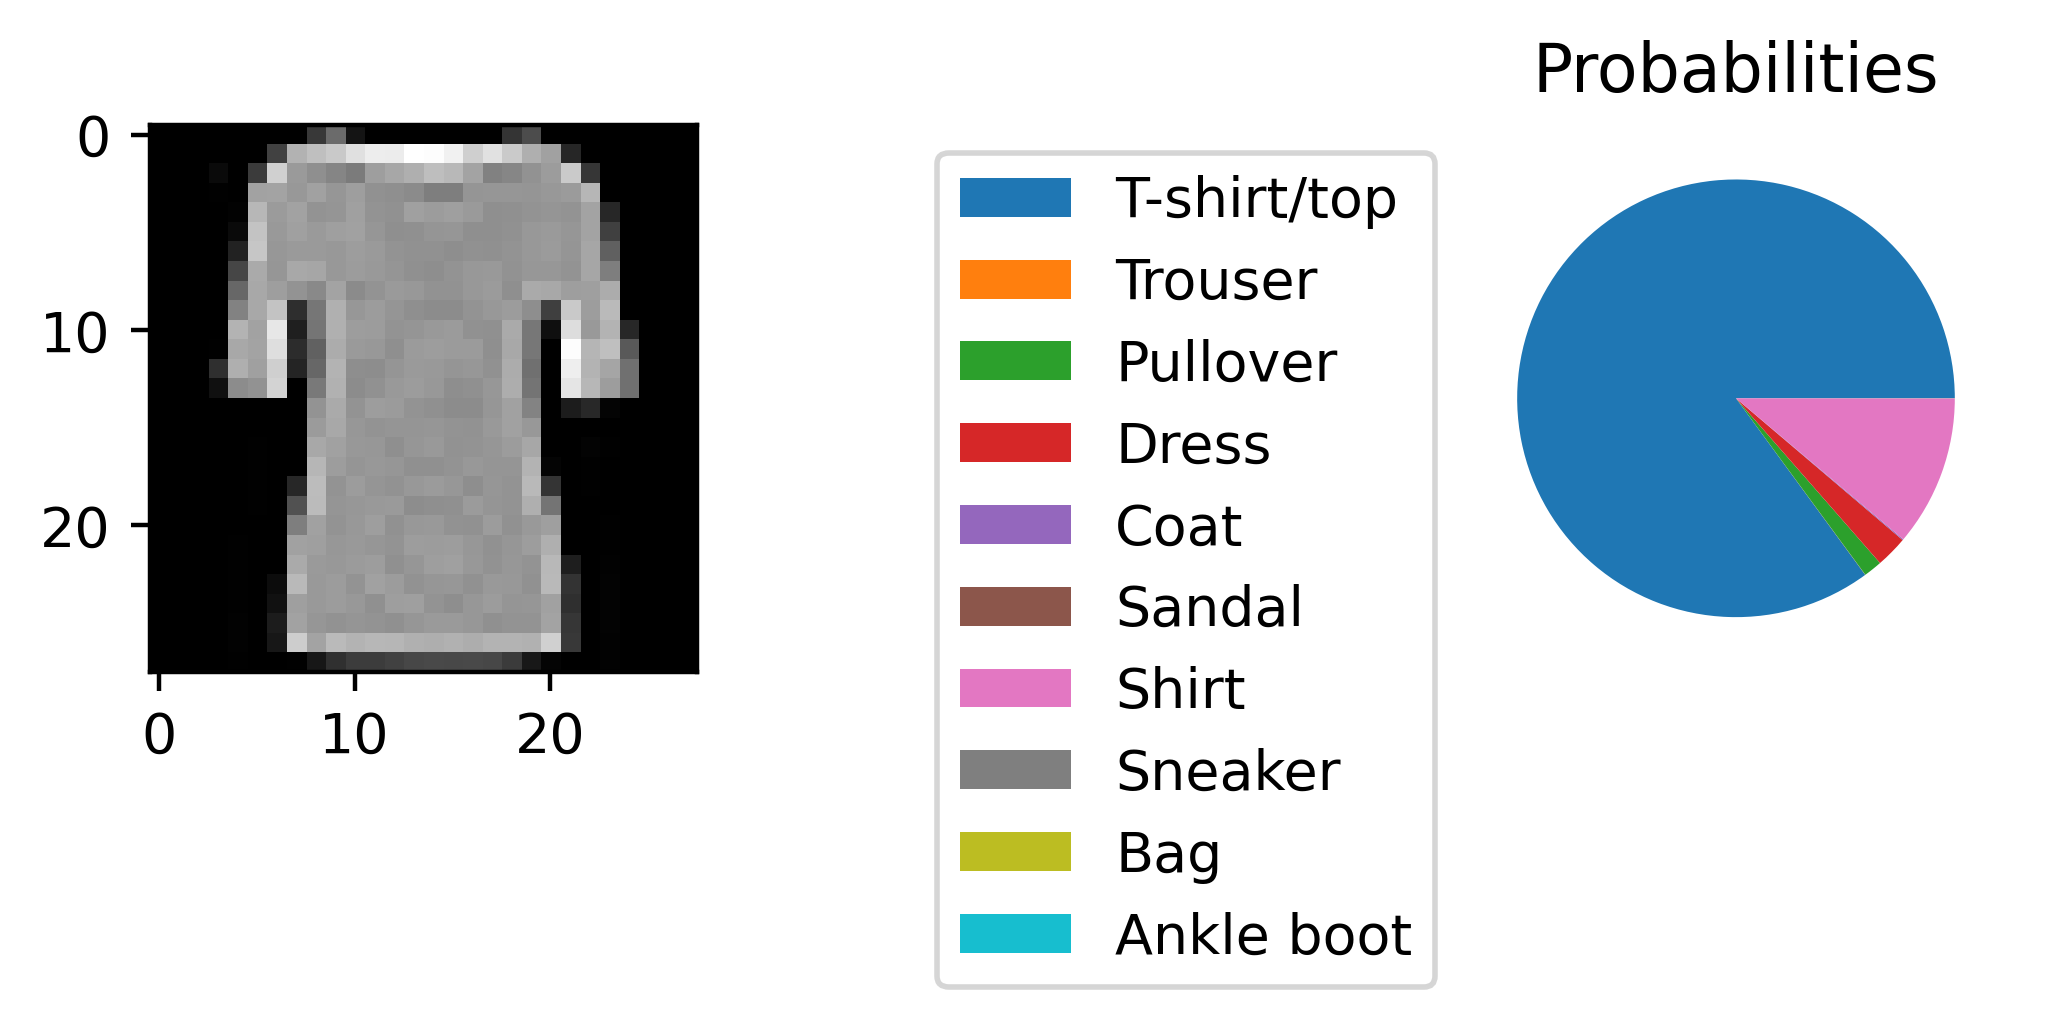

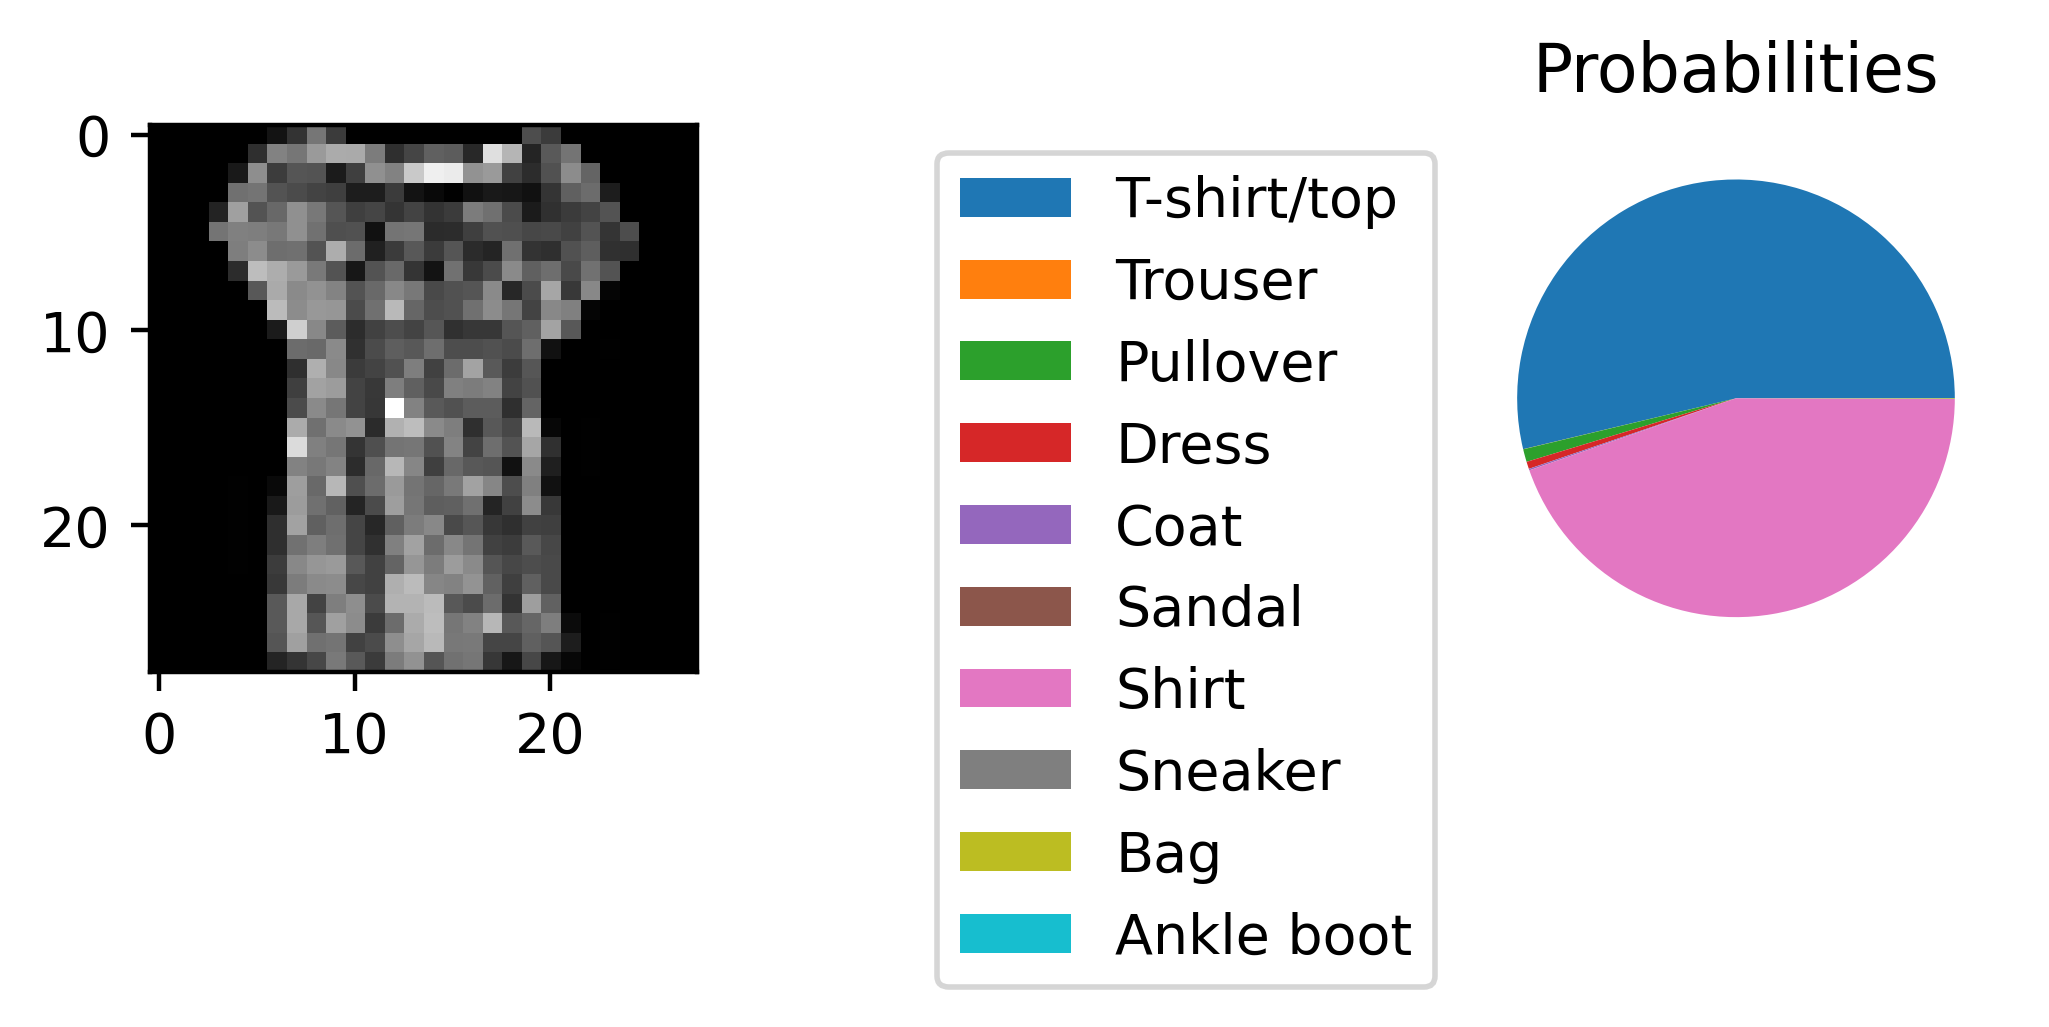

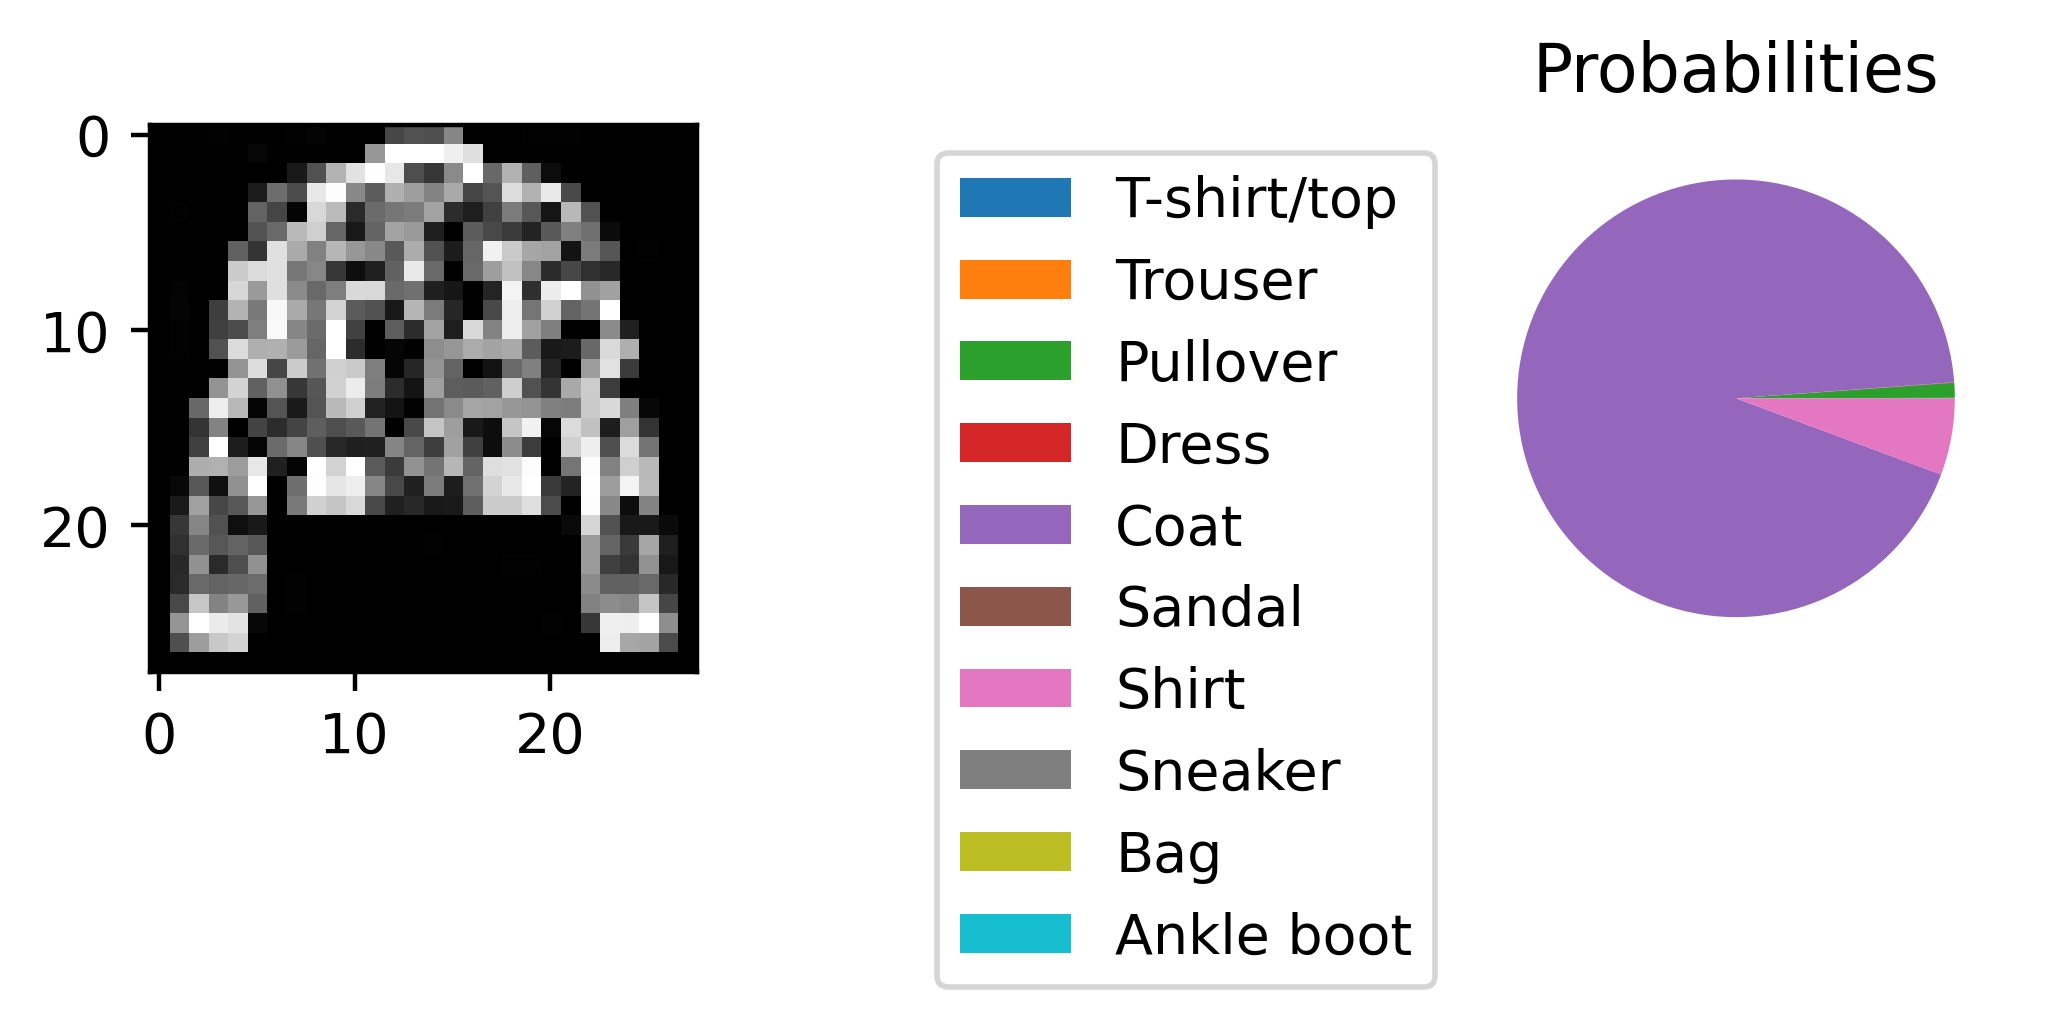

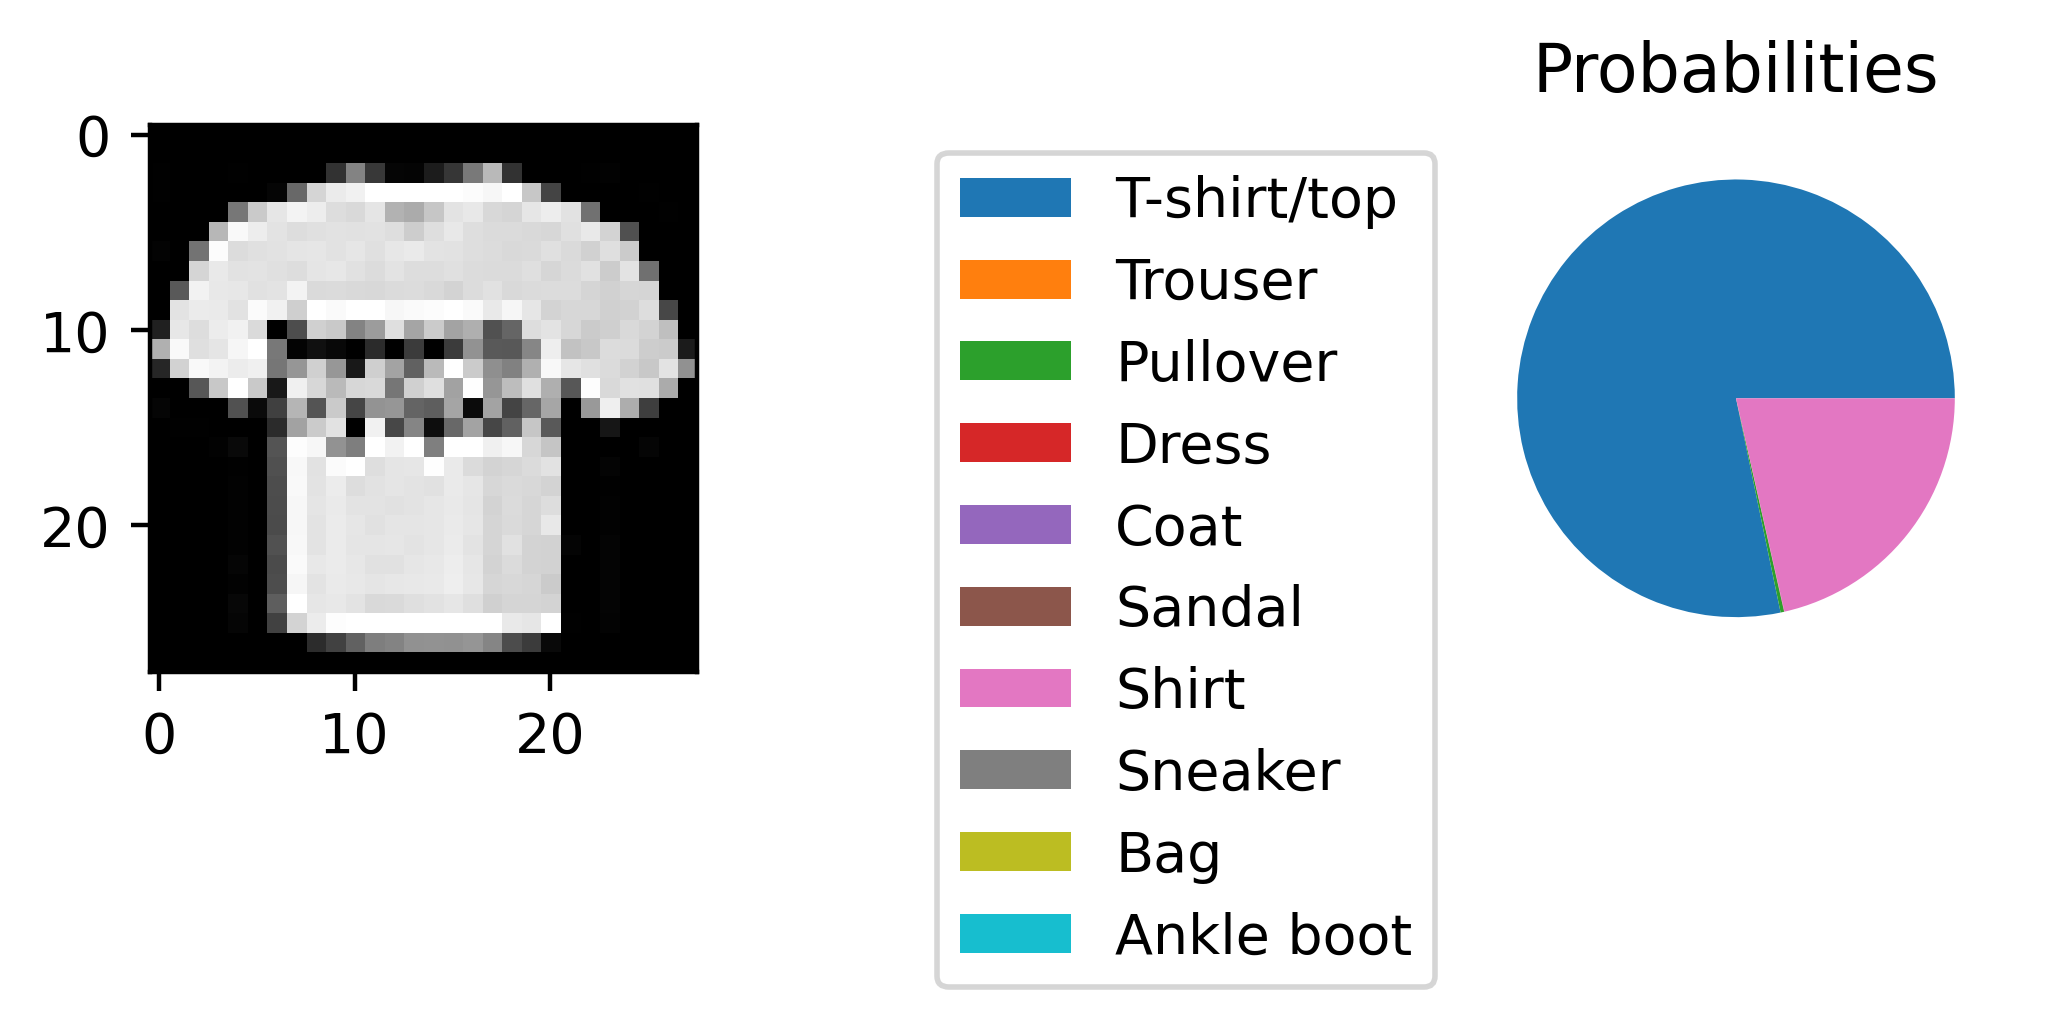

In [ ]:
dataiter = iter(val_l)
for i in range(10):
  images, labels = dataiter.next()
  img = images[0]
  #img = img.resize_(1, 784)

  
  fig = plt.figure(figsize=(6,15), dpi=400) 
  ax1 = plt.subplot2grid((1,3), (0,0))
  ax1.imshow(img[0], "gray")
  

  with torch.no_grad():
      results = model(img)
  probs = torch.exp(results)
  probs = (probs.squeeze_()).numpy()
  names = (training_data.classes)

  ax2 = plt.subplot2grid((1,3), (0,2))
  ax2.pie(probs)
  plt.title("Probabilities")
  ax2.legend(names, bbox_to_anchor=(0, 1))
  plt.show()

# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN

In [ ]:
from sklearn.tree import DecisionTreeClassifier

train = training_data.data.numpy()
#print (train)
train = train.reshape(-1, 784)

train_labels = training_data.targets.numpy()

test = test_data.data.numpy()
test = test.reshape(-1, 784)
test_labels = test_data.targets.numpy()

dt = DecisionTreeClassifier()
dt.fit(train, train_labels)

predicts = dt.predict(test)
acur = (predicts == test_labels).sum() / len(predicts)
print("Decision Tree Accuracy ", (acur * 100), "%")


Decision Tree Accuracy  79.25 %


In [ ]:
from sklearn.linear_model import LogisticRegression


model_log = LogisticRegression()
model_log.fit(train, train_labels)

predicts = model_log.predict(test)
acur = (predicts == test_labels).sum() / len(predicts)
print("Logistic Regression Accuracy ", (acur * 100), "%")

Logistic Regression Accuracy  84.11999999999999 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
